# Scientific python: NumPy, SciPy and Matplotlib

Note that this notebook should be opened within the `mpm2024` (or a similar custom made) environment to ensure that all cells below can be ran successfully.

## Today's Learning objectives

  * Learn what NumPy arrays are
  * Learn basic array manipulations
  * Learn what vectorial code is
  * Quick overview of SciPy
  * Learn how to create a simple 2D plot and decorate it
  * Learn how to combine multiple plots into a single figure

Some aspects of today's lecture will be revision for many of you. However, we'll mention some important concepts that you may not have thought about previously, e.g. the importance of utilising `NumPy` vectorisation in writing efficient code! Understanding and appreciating these finer aspects of using `NumPy` will be crucial going forward in this course.

## Further reading
* http://scipy-lectures.org
* https://www.nature.com/articles/s41586-020-2649-2
* https://numpy.org/doc/

## SciPy ecosystem

From their [website](https://scipy.org):
> SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering. In particular, these are some of the core packages:
>  * NumPy
>  * SciPy library
>  * Matplotlib 
>  * IPython
>  * Sympy
>  * Pandas

...and much more.

## NumPy

* NumPy is a key building block used by SciPy.

* NumPy supports:

  * Multidimensional arrays (`ndarray`)
  * Matrices and linear algebra operations
  * Random number generation
  * Fourier transforms
  * Polynomials
  * Tools for integrating with Fortran/C libraries
  
* NumPy provides fast precompiled functions for numerical routines.

* Official website: https://www.numpy.org/

## "Array programming with NumPy"
https://www.nature.com/articles/s41586-020-2649-2

**Abstract**: *Array programming provides a powerful, compact and expressive syntax for accessing, manipulating and operating on data in vectors, matrices and higher-dimensional arrays. NumPy is the primary array programming library for the Python language. It has an essential role in research analysis pipelines in fields as diverse as physics, chemistry, astronomy, geoscience, biology, psychology, materials science, engineering, finance and economics. For example, in astronomy, NumPy was an important part of the software stack used in the discovery of gravitational waves and in the first imaging of a black hole. Here we review how a few fundamental array concepts lead to a simple and powerful programming paradigm for organizing, exploring and analysing scientific data. NumPy is the foundation upon which the scientific Python ecosystem is constructed. It is so pervasive that several projects, targeting audiences with specialized needs, have developed their own NumPy-like interfaces and array objects. Owing to its central position in the ecosystem, NumPy increasingly acts as an interoperability layer between such array computation libraries and, together with its application programming interface (API), provides a flexible framework to support the next decade of scientific and industrial analysis.*

### NumPy Arrays overview

* Core (or Standard) Python Library provides lists and 1D arrays

  * Lists are general containers for objects
  * Arrays are 1D containers for objects of the same type
  * Limited functionality
  * Some memory and performance overhead associated with these structures

* NumPy provides multidimensional arrays (`numpy.ndarray`)
  * Can store many elements of the same data type in multiple dimensions
  * cf. Fortran/C/C++ arrays
  * More functionality than Core Python e.g. many convenient methods for array manipulation
  * Efficient storage and execution

* [Extensive online documentation !](https://docs.scipy.org/doc/numpy/)

### A note on `PyBryt`

In the material below you will see that the Python package [PyBryt](https://github.com/microsoft/pybryt) is imported and used to check your solution against some tested reference solution. You may already be somewhat familiar with `PyBryt` from the pre-sessional material. In any case, you don't need to worry about this package in terms of how it works etc., it's simply included here to provide rapid feedback regarding the correctness of certain exercises. Hence there's no need to fiddle with any `PyBryt` related code in this notebook.

#### Some required imports

In [1]:
# Import pybryt which will be used to check your solutions against reference solutions
import pybryt
from reflecture import pybryt_reference

In [2]:
# Convention: Import numpy and alias/rename it as np
import numpy as np

### Creating 1D arrays

There are many ways to create 1d array, *e.g.*:

In [3]:
# Create array from Python list.
a = np.array([-1, 0, 1])
print(a)

[-1  0  1]


In [4]:
# Create array using the array class copy constructor.
b = np.array(a)
print(b)

[-1  0  1]


While these might look the same when printed above, all `NumPy` arrays are of type '`ndarray`':

In [5]:
print(type(b))
li = [1, 2, 3]
print(type(li))

<class 'numpy.ndarray'>
<class 'list'>


Arrays can also be created using `NumPy` functions, *e.g.*

In [6]:
# https://numpy.org/doc/stable/reference/generated/numpy.arange.html
# arange for arrays (like using range for lists)
a = np.arange(-2, 6, 2)
print(a)

[-2  0  2  4]


In [7]:
# https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
# linspace to create sample step points in an interval
a = np.linspace(-10, 10, 4) 
print(a)

[-10.          -3.33333333   3.33333333  10.        ]


In [8]:
# Contrast this with arange.
print(np.arange(-10, 10, 4))

[-10  -6  -2   2   6]


### <span style="color:blue">Exercise 2.1</span>
Add comments explaining what the following `NumPy` functions do.

In [9]:
b = np.zeros(3)  # Create an array of zeros with 3 elements
print(b)  # Output: [0. 0. 0.]

[0. 0. 0.]


In [10]:
c = np.ones(3)  # Create an array of ones with 3 elements
print(c)  # Output: [1. 1. 1.]

[1. 1. 1.]


In [11]:
d = np.eye(3)  # Create a 3x3 identity matri
print(d)  
# Output:
# [[1. 0. 0.]
#  [0. 1. 0.]
#  [0. 0. 1.]]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Array attributes

As part of the array structure, `NumPy` keeps track of metadata for the array as "attributes".

In [12]:
# Taking "a" from the previous example
a = np.linspace(-10, 10, 5) 

In [13]:
# Examine key array attributes
print(a)
print("Dimensions ", a.ndim)   # Number of dimensions
print("Shape      ", a.shape)  # number of elements in each dimension
print("Size       ", a.size)   # total number of elements
print("Data type  ", a.dtype)  # data type of element, 64 bit float (IEEE 754) by default

[-10.  -5.   0.   5.  10.]
Dimensions  1
Shape       (5,)
Size        5
Data type   float64


Basic data type can be specified at creation:

In [14]:
a = np.array( [1.1,2.2,3.3], np.float32)
print(a)
print("Data type", a.dtype)

[1.1 2.2 3.3]
Data type float32


In [15]:
a = np.array([1,2,3,4], np.float64)
print(a)
print("Data type", a.dtype)

[1. 2. 3. 4.]
Data type float64


### Multi-dimensional arrays

There are many different ways to create N-dimensional arrays. A two-dimensional array or matrix can be created from, e.g., list of lists.

In [16]:
mat = np.array( [[1,2,3], [4,5,6]] )
print(mat)
print("Dimensions: ", mat.ndim)
print("Size:       ", mat.size)
print("Shape:      ", mat.shape)

[[1 2 3]
 [4 5 6]]
Dimensions:  2
Size:        6
Shape:       (2, 3)


`pprint` (*'pretty print'*) can be used for fancier display of multi-dimensional arrays:

In [17]:
from pprint import pprint

pprint(mat)

array([[1, 2, 3],
       [4, 5, 6]])


You can create 2d arrays with complex elements by specifying the data type.

In [18]:
alist = [[1, 2, 3], [4, 5, 6]]
mat = np.array(alist, complex)
pprint(mat)

array([[1.+0.j, 2.+0.j, 3.+0.j],
       [4.+0.j, 5.+0.j, 6.+0.j]])


### <span style="color:blue">Exercise 2.2</span>

Work out the shape of the resulting arrays by 'sight'. <br>

In [19]:
## don't change the following line of code in any way
a = np.array([[11, 12, 13], [21, 22, 23], [31, 32, 33], [41, 42, 43]])
b = np.array([[[1, 1], [2, 2], [3, 3], [4, 4]], [[1, 1], [2, 2], [3, 3], [4, 4]],
              [[1, 1], [2, 2], [3, 3], [4, 4]]])

Now, write their shapes as `tuple`s in the cell below:

In [20]:
## Solution
shape_a = (4, 3)
shape_b = (3, 4, 2)

In [21]:
## The following code is used to check you solution and should not be modified
## It should help you by providing feedback to the solution you have provided
with pybryt.check(pybryt_reference(2, 21)):
    a
    shape_a

REFERENCE: exercise-2_21
SATISFIED: True
MESSAGES:
  - SUCCESS: Array `a` checked: OK
  - SUCCESS: Correct number of columns and/or rows


In [22]:
## The following code is used to check you solution and should not be modified
## It should help you by providing feedback to the solution you have provided
with pybryt.check(pybryt_reference(2, 22)):
    b
    shape_b

REFERENCE: exercise-2_22
SATISFIED: True
MESSAGES:
  - SUCCESS: Array `b` checked: OK
  - SUCCESS: Correct number of columns and/or rows


In [23]:
pprint(a)
print("a", a.shape)
print(a.ndim)
print(a.size)

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33],
       [41, 42, 43]])
a (4, 3)
2
12


In [24]:
pprint(b)
print("b", b.shape)
print(b.ndim)
print(b.size)

array([[[1, 1],
        [2, 2],
        [3, 3],
        [4, 4]],

       [[1, 1],
        [2, 2],
        [3, 3],
        [4, 4]],

       [[1, 1],
        [2, 2],
        [3, 3],
        [4, 4]]])
b (3, 4, 2)
3
24


### Accessing arrays

Basic indexing and slicing can be used to access array elements, as we know from lists.

In [25]:
# a[start:stop:stride] (not inclusive of stop)
a = np.arange(8)     # another function for creating arrays
print("a:", a)
print("a[2:4]:", a[2:4])
print("a[0:7:3]:", a[0:7:3])
print("a[:5:2]:", a[:5:2])

a: [0 1 2 3 4 5 6 7]
a[2:4]: [2 3]
a[0:7:3]: [0 3 6]
a[:5:2]: [0 2 4]


Negative (or modulo) indices are valid:

In [26]:
# To, e.g., access the last element
print(a[-1])

7


### <span style="color:blue">Exercise 2.3</span>

Manually create an `np.array` called `b` which is equivalent to the output of `a[2:-3:2]`.

In [27]:
## Solution
b = a[2:-3:2]

In [28]:
## The following code is used to check you solution and should not be modified
## It should help you by providing feedback to the solution you have provided
with pybryt.check(pybryt_reference(2, 3)):
    a
    b

REFERENCE: exercise-2_3
SATISFIED: True
MESSAGES:
  - SUCCESS: array `a` checked: OK
  - SUCCESS: That would be the correct output.


For multi-dimensional arrays, tuples or index notations can be used.

In [29]:
# Basic indexing of a 3d array
c = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
pprint(c)

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])


In [30]:
print(c.shape)
print("c[1][0][1]:", c[1][0][1]) # using index notation
print("c[1, 0, 1]:", c[1, 0, 1]) # using a tuple (more performant)

(2, 2, 2)
c[1][0][1]: 6
c[1, 0, 1]: 6


In [31]:
c = np.array([[1, 2, 3],[5, 6, 8]])
pprint(c)
print(c.shape)
print("c[1][2]:", c[1][2]) # using index notation
print("c[1, 2]:", c[1, 2])     # using a tuple (more performant)

array([[1, 2, 3],
       [5, 6, 8]])
(2, 3)
c[1][2]: 8
c[1, 2]: 8


In [32]:
c = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
pprint(c)

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])


If the number of indices given is less than the number of axes, missing axes are taken as complete slices.

In [33]:
pprint(c[1])
pprint(c[1, 0])
pprint(c[1, 0, ...]) # can use elipsis (3 dots) for missing indices

array([[5, 6],
       [7, 8]])
array([5, 6])
array([5, 6])


Slicing tuple objects can also be created to extract/manipulate indices. A slicing object takes the form `slice(start, stop, step)`. Therefore, to take the slice `a[2:-3:2]` we could also write

In [34]:
pprint(a)
pprint(a[2:-3:2])
my_slice = (slice(2, -3, 2))
pprint(a[my_slice])

array([0, 1, 2, 3, 4, 5, 6, 7])
array([2, 4])
array([2, 4])


Note that a negative step can also be used to invert an array. Take for example

In [35]:
d = np.arange(9).reshape(3,3)
print(d)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


This can be inverted along both axes via

In [36]:
print(d[::-1, ::-1])

[[8 7 6]
 [5 4 3]
 [2 1 0]]


or equivalently

In [37]:
print(d[(slice(None, None, -1), slice(None, None, -1))])

[[8 7 6]
 [5 4 3]
 [2 1 0]]


### Array copies

Simple assignment creates references or 'shallow' copies of arrays.

In [38]:
a = np.array([-2, 6, 2])
print("a", a)
b = a
a[0] = 20

# b points to a, hence printing a and b will produce the same result
pprint(a)
pprint(b)

a [-2  6  2]
array([20,  6,  2])
array([20,  6,  2])


Use `copy()` to create a true or 'deep' copy.

In [39]:
c = a.copy()
# check c really is an independent copy of a
c[2] = 42
print(a)
print(c)

[20  6  2]
[20  6 42]


### Views from slices

A "view" is an array that refers to another array's data (like references). You can create a view of an array by selecting a slice of an array. No data is copied when a view is created.

In [40]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) 
pprint(a)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])


In [41]:
# You then create a view as follows:
s = a[2:3, 1:3]
print(s)

[[8 9]]


Lets check the behavior if we modify and element of `s`:

In [42]:
s[:, :] = -2
print("s", s)
print("a", a)

s [[-2 -2]]
a [[ 1  2  3]
 [ 4  5  6]
 [ 7 -2 -2]]


### <span style="color:blue">Exercise 2.4</span>
Create a two-dimensional array called `m` to represent the following matrix,
$$
\mathbf{m} = \left\lbrack\begin{array}{ccc}
1 & 1 & 2\cr
3 & 5 & 8\cr
13 & 21 & 34\cr
55 & 89 & 144
\end{array}\right\rbrack
$$

Then change all the elements with values 21, 34, 89, and 144 in matrix `m` (i.e. bottom right corner elements) to 1001 by using a slice.

In [43]:
## Solution
m = np.array([
    [1, 1, 2],
    [3, 5, 8],
    [13, 21, 34],
    [55, 89, 144]
])

m[2:, 1:] = 1001

print(m)

[[   1    1    2]
 [   3    5    8]
 [  13 1001 1001]
 [  55 1001 1001]]


In [44]:
# The following code is used to check your answer and should not be modified
with pybryt.check(pybryt_reference(2, 4)):
    m

REFERENCE: exercise-2_4
SATISFIED: True
MESSAGES:
  - SUCCESS: Great, you have succesfully affected the change to the array.


### Reshaping arrays

The shape of an array can be modified, and/or its size changed:

In [45]:
a = np.arange(6)
print("a = ")
pprint(a)
print("a.shape = ", a.shape, "\n")

# The new shape should be compatible with the old shape
a.shape = (3,2)
pprint(a)

a = 
array([0, 1, 2, 3, 4, 5])
a.shape =  (6,) 

array([[0, 1],
       [2, 3],
       [4, 5]])


In [46]:
# Or you can alter the size and shape of the array with resize().
# https://numpy.org/doc/stable/reference/generated/numpy.resize.html
mat = np.arange(6)
print("mat = ", mat)

mat1 = np.resize(mat, (3, 2))
print("mat1 = ", mat1)

mat2 = np.resize(mat, (3, 9))
print("mat2 = ", mat2)

mat3 = np.reshape(mat, (3, 2))
print("mat3 = ", mat3)

mat =  [0 1 2 3 4 5]
mat1 =  [[0 1]
 [2 3]
 [4 5]]
mat2 =  [[0 1 2 3 4 5 0 1 2]
 [3 4 5 0 1 2 3 4 5]
 [0 1 2 3 4 5 0 1 2]]
mat3 =  [[0 1]
 [2 3]
 [4 5]]


Note that `mat1`, `mat2` and `mat3` are copies of `mat` <br>
`base` can be used to check if arrays share the same data (*i.e.* they are not copies):

In [47]:
mat1.base is mat

False

### <span style="color:blue">Exercise 2.5</span>

How is `reshape()` different from `resize()`? Recall that you can view docstrings via, e.g., `print(np.reshape.__doc__)` or `help(np.reshape)` etc.

In [48]:
# Let's use this simple array to run the check.
e = np.arange(8)
# check if/how reshape and resize are different using the array above:

# Using reshape()
reshaped_e = e.reshape((2, 4))
print("Original array (e):")
print(e)
print("Reshaped array (reshaped_e):")
print(reshaped_e)

# Using resize()
e.resize((2, 4))
print("Resized array (e):")
print(e)

Original array (e):
[0 1 2 3 4 5 6 7]
Reshaped array (reshaped_e):
[[0 1 2 3]
 [4 5 6 7]]
Resized array (e):
[[0 1 2 3]
 [4 5 6 7]]


### Vectorization and operations on arrays

Vectorization is why numpy arrays are great. It allows element-wise operations (and importantly avoids the need of writing loops!). What output do the following cells give?

In [49]:
a = np.arange(10).reshape([2,5])
b = np.arange(10).reshape([2,5])
print(a)
print(b)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0 1 2 3 4]
 [5 6 7 8 9]]


In [50]:
# Try these
-0.1*a
print(-0.1*a)

print(a+b)

[[-0.  -0.1 -0.2 -0.3 -0.4]
 [-0.5 -0.6 -0.7 -0.8 -0.9]]
[[ 0  2  4  6  8]
 [10 12 14 16 18]]


In [51]:
# Note that this is element wise multiplication, not matrix multiplication!
a*b

array([[ 0,  1,  4,  9, 16],
       [25, 36, 49, 64, 81]])

In [52]:
# Use dot product for vector/matrix multiplication
# Note: .T gives you transpose of matrix i.e. reshapes it
a.dot(b.T)

array([[ 30,  80],
       [ 80, 255]])

Be careful: the type of data elements matters here!

Vectorization also works with functions!

In [53]:
def f(x):
    return x**3

x = np.array([1,2,3,4,5,6,7,8,9])
y = f(x)

print(y)

[  1   8  27  64 125 216 343 512 729]


### <span style="color:blue">Exercise 2.6</span>

Let $A$ be the two-dimensional array
$$
\mathbf{A} = \left\lbrack\begin{array}{ccc}
2 & 1 & 0\cr
-1 & 2 & 1\cr
0 & -1 & 2
\end{array}\right\rbrack
$$

In the following cell, initialise `A` as an `np.array`.

In [54]:
## Solution...
A = np.array([
    [2, 1, 0],
    [-1, 2, 1],
    [0, -1, 2]
])

print(A)

[[ 2  1  0]
 [-1  2  1]
 [ 0 -1  2]]


Next, implement the function
$$
f(x) = x^3 + xe^x + 1
$$
and then apply it to the array $A$. <br>
To check you get the expected  result ensure the function is called `f_02_06`, i.e. implement as `def f_02_06(x): ...`

In [55]:
# Solution...
def f_02_06(x):
    return x**3 + x * np.exp(x) + 1

# Initialize the array A
A = np.array([
    [2, 1, 0],
    [-1, 2, 1],
    [0, -1, 2]
])

# Apply the function to the array A
result = f_02_06(A)
print(result)

[[23.7781122   4.71828183  1.        ]
 [-0.36787944 23.7781122   4.71828183]
 [ 1.         -0.36787944 23.7781122 ]]


In [56]:
## The following code is used to check you solution and should not be modified
## It should help you by providing feedback to the solution you have provided
with pybryt.check(pybryt_reference(2, 6)):
    f_02_06(A)

REFERENCE: exercise-2_6
SATISFIED: True
MESSAGES:
  - Matrix `A` checked and it looks good.
  - SUCCESS: Amazing! Your function returns the correct solution.


### Manipulating arrays

There are many methods for manipulating arrays (reshaping, joining, splitting, inserting, ...). Check the documentation at https://numpy.org/doc/stable/reference/ or https://docs.python.org/3/reference/index.html

E.g.,
```python
concatenate((a1,a2),axis=0)
split(a, indices_or_sections, axis=0)
flatten
ravel(a)
stack(arrays[, axis])
tile(a, reps)
repeat(a, repeats[, axis])
unique(ar[, return_index, return_inverse, ...])
trim_zeros(filt[, trim])
fill(scalar)
xv, yv = meshgrid(x,y)
```

### <span style="color:blue">Exercise 2.7</span>

See what arrays you can create from some of the functions listed above. An example is provided for `concatenate` but experiment with some of the other functions listed.

In [57]:
## e.g., let's see what concatenate does:
a1 = np.array([[1,2,3],[4,5,6]])
a2 = np.array([[7,8,9],[10,11,12]])
a3 = np.concatenate((a1,a2),axis=1)
print(a3)

[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]


In [58]:
## Experiment in here:

# split
a = np.array([1, 2, 3, 4, 5, 6])
b = np.split(a, 3)
print('split:')
print(b)
print('\n')

# flatten
a = np.array([[1, 2, 3], [4, 5, 6]])
b = a.flatten()
print('flatten:')
print(b)
print('\n')

# ravel
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.ravel(a)
print('ravel:')
print(b)
print('\n')

# stack
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.stack((a, b), axis=0)
print('stack:')
print(c)
print('\n')

# tile
a = np.array([1, 2, 3])
b = np.tile(a, 2)
print('tile:')
print(b)
print('\n')

# repeat
a = np.array([1, 2, 3])
b = np.repeat(a, 2)
print('repeat:')
print(b)
print('\n')

# unique
a = np.array([1, 2, 2, 3, 3, 3])
b = np.unique(a)
print('unique:')
print(b)
print('\n')

# trim_zeros
a = np.array([0, 0, 1, 2, 0, 0])
b = np.trim_zeros(a)
print('trim_zeros:')
print(b)
print('\n')

# fill
a = np.array([1, 2, 3])
a.fill(0)
print('fill:')
print(a)
print('\n')

# meshgrid
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
xv, yv = np.meshgrid(x, y)
print('meshgrid:')
print(xv)
print('\n')
print(yv)

split:
[array([1, 2]), array([3, 4]), array([5, 6])]


flatten:
[1 2 3 4 5 6]


ravel:
[1 2 3 4 5 6]


stack:
[[1 2 3]
 [4 5 6]]


tile:
[1 2 3 1 2 3]


repeat:
[1 1 2 2 3 3]


unique:
[1 2 3]


trim_zeros:
[1 2]


fill:
[0 0 0]


meshgrid:
[[1 2 3]
 [1 2 3]
 [1 2 3]]


[[4 4 4]
 [5 5 5]
 [6 6 6]]


Next, use `concatenate` to combine arrays `a1` and `a2` into an array called `a4` with the following arrangement:

$$
\left\lbrack\begin{array}{ccc}
1 & 2 & 3\cr
4 & 5 & 6\cr
7 & 8 & 9\cr
10 & 11 & 12
\end{array}\right\rbrack
$$

In [59]:
## Solution...
a4 = np.concatenate((a1, a2), axis=0)
print(a4)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [60]:
## The following code is used to check you solution and should not be modified
## It should help you by providing feedback to the solution you have provided
with pybryt.check(pybryt_reference(2, 7)):
    a1
    a2
    a4

REFERENCE: exercise-2_7
SATISFIED: True
MESSAGES:
  - SUCCESS: Array `a1` check: OK.
  - SUCCESS: Array `a2` check: OK.
  - SUCCESS: Super! Array `a4` appears as expected.


### Fancy indexing

Advanced or fancy indexing lets you do more than simple indexing. <br>
Let's see how you can index multiple elements of an array and return that as another array.

In [61]:
p = np.array([[0, 1, 2],[3, 4, 5],[6, 7,8],[9, 10, 11]])
pprint(p)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])


In [62]:
rows = [0, 0, 3, 3]   # indices for rows
cols = [0, 2, 0, 2]   # indices for columns
q = p[rows, cols]
print(q)

[ 0  2  9 11]


Fancy indexing returns a copy (not a view like slicing)

In [63]:
# Check if q is a view or a copy
# If we change the value of an element in the copy it does not effect the value in the original - unlike views.
q[0] = 1000
print(q)
print(p)

[1000    2    9   11]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


### <span style="color:blue">Exercise 2.8</span>

Use `base` to check if array `q` is a copy of array `p`. Use `base` to check. <br>
Now, do the same for a simple indexed slice of `p` (e.g. `p[1:2,3:4]`).

In [64]:
# Solution...

p = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

q = p.copy()

# Check if q is a copy of p
print(q.base is p)  # Should print False

# Create a view of p using slicing
r = p[1:2, 3:4]

# Check if r is a view of p
print(r.base is p)  # Should print True

False
True


### Logical expressions and boolean masks

Logical expressions and boolean 'masks' can be used to find indices of elements of interest e.g.

In [65]:
# Find the elements in an arraey with a value less than zero
m = np.array([[0, -1, 4, 20, 99], [-3, -5, 6, 7, -10]])
print(m)
print(m[m < 0])

[[  0  -1   4  20  99]
 [ -3  -5   6   7 -10]]
[ -1  -3  -5 -10]


We can of course use other logical operators such as `>`, `<=` etc. in such expressions and even functions, and so forth, to create more complicated masks.

### <span style="color:blue">Exercise 2.9</span>

Challenge yourself to anticipate the output of the following code before running it.

In [66]:
a = np.arange(10)
print(a)
mask = np.ones(len(a), dtype=bool)
mask[[0,2,4]] = False  # set certain mask values to False
result = a[mask]

[0 1 2 3 4 5 6 7 8 9]


Check if you are correct by by printing the result below:

In [67]:
## check using pprint
pprint(result)

array([1, 3, 5, 6, 7, 8, 9])


Now write a function called `f_02_09` using `mask` to return an array function with the following elements from array `a` removed: 3, 5, and 9. <br>
That is, the function should take the array `a` as input and return the 'modified' `a` (without elements 3, 5 and 9).

In [68]:
## Solution...
def f_02_09(a):
    # Define the elements to be removed
    elements_to_remove = np.array([3, 5, 9])
    
    # Create a mask that is True for elements not in elements_to_remove
    mask = ~np.isin(a, elements_to_remove)
    
    # Use the mask to filter the array
    return a[mask]

In [69]:
## The following code is used to check you solution and should not be modified
## It should help you by providing feedback to the solution you have provided
with pybryt.check(pybryt_reference(2, 9)):
    print(f_02_09(a))

[0 1 2 4 6 7 8]
REFERENCE: exercise-2_9
SATISFIED: True
MESSAGES:
  - SUCCESS: You are using the correct input parameter to test your function.
  - SUCCESS: Great! Your function returns the correct result.


### Random number generation

Numpy provides utilities for random number generation.

In [70]:
# Create an array of 10 random real numbers
a = np.random.ranf(10)
print(a)

[0.68240663 0.68102289 0.25118099 0.54911125 0.2753268  0.96097314
 0.94113758 0.11935136 0.79571897 0.25393066]


In [71]:
# Create a 2d array (5x5) reshaped matrix from a 1d array of (25) 
# random ints between 0 and 5 (not inclusive)
a = np.random.randint(0,high=5,size=25).reshape(5,5)   
pprint(a)

array([[1, 0, 2, 2, 4],
       [4, 3, 4, 3, 0],
       [3, 3, 4, 0, 2],
       [3, 0, 4, 4, 4],
       [2, 1, 0, 4, 2]])


In [72]:
# Generate sample from normal distribution
# (mean=0, standard deviation=1)
s = np.random.standard_normal((5,5))
pprint(s)

array([[ 0.31769456, -0.31940012,  0.21688997, -0.38484373,  1.70420231],
       [-0.80152102,  0.54543583, -0.67077676, -0.48473539,  0.20215661],
       [-0.53903614, -0.84297723,  0.23415166, -0.7040923 , -0.20865012],
       [ 2.17636042,  1.56577619, -0.18346807,  0.14997433,  0.85996348],
       [-0.96921181,  0.19118748, -0.46556124,  0.20239626, -0.21164834]])


### <span style="color:blue">Exercise 2.10</span>

Explore other ways of generating random numbers. <br>
Below you will find an example for generating samples from a binomial distribution. <br>
What other distributions can you sample? <br>
Further documentation: https://numpy.org/doc/stable/reference/random/generator.html

In [73]:
s = np.random.binomial(5, 0.5, size=25)
pprint(s)

array([4, 3, 2, 5, 1, 2, 2, 2, 3, 5, 1, 2, 4, 4, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 3, 2])


In [74]:
# Test some other distributions here

# Uniform Distribution
uniform_samples = np.random.uniform(low=0.0, high=1.0, size=25)
pprint(uniform_samples)

# Normal (Gaussian) Distribution
normal_samples = np.random.normal(loc=0.0, scale=1.0, size=25)
pprint(normal_samples)

# Poisson Distribution
poisson_samples = np.random.poisson(lam=3.0, size=25)
pprint(poisson_samples)

# Exponential Distribution
exponential_samples = np.random.exponential(scale=1.0, size=25)
pprint(exponential_samples)

# Beta Distribution
beta_samples = np.random.beta(a=2.0, b=5.0, size=25)
pprint(beta_samples)

# Gamma Distribution
gamma_samples = np.random.gamma(shape=2.0, scale=2.0, size=25)
pprint(gamma_samples)

# Chi-Square Distribution
chi_square_samples = np.random.chisquare(df=2, size=25)
pprint(chi_square_samples)

array([0.43165595, 0.1157763 , 0.8501952 , 0.8044892 , 0.69744122,
       0.72626461, 0.73116771, 0.65152077, 0.32524968, 0.9496446 ,
       0.30778875, 0.39287801, 0.38038879, 0.92354921, 0.42454006,
       0.02981647, 0.81273885, 0.46386038, 0.56013145, 0.71594012,
       0.53145473, 0.17147828, 0.09820596, 0.53182147, 0.47955488])
array([-0.00251126,  0.01462554,  0.36719947, -1.18709039,  1.14890673,
       -0.07876126,  0.19759777,  0.58354878,  0.13032387,  1.08750481,
        0.24676818, -0.31857776, -0.99100183,  0.760375  , -2.32646345,
       -0.22564051,  0.6387904 ,  1.08704181,  0.3541936 , -0.74120647,
       -1.32432467,  0.96563271, -1.71460529, -0.09812512,  0.97840074])
array([2, 3, 1, 2, 2, 3, 4, 4, 3, 2, 1, 4, 3, 0, 3, 4, 2, 2, 4, 3, 5, 2,
       3, 2, 2])
array([0.82490463, 1.87814101, 0.2069252 , 2.05320467, 0.87944009,
       1.58797425, 0.31806951, 0.01446931, 0.30006035, 2.23234865,
       0.32854446, 0.67743263, 1.42786096, 0.05556014, 1.20906456,
       1.954

### File operations

Numpy provides an easy way to save data to text file and to read *structured* data.

In [75]:
# Generate an array of 5 random real numbers
pts = 5
x = np.arange(pts)
y = np.random.random(pts)+1
print(x)
print(y)

[0 1 2 3 4]
[1.95857732 1.52634334 1.74538006 1.5685089  1.29211731]


In [76]:
# data format specifiers: d = int, f = float, e = exponential
np.savetxt('savedata.txt', np.stack((x,y),axis=1), header='DATA', \
           footer='END', fmt='%d %1.4f')
!cat savedata.txt

# DATA
0 1.9586
1 1.5263
2 1.7454
3 1.5685
4 1.2921
# END


In [77]:
# Reload data to an array
p = np.loadtxt('savedata.txt')
print(p)

[[0.     1.9586]
 [1.     1.5263]
 [2.     1.7454]
 [3.     1.5685]
 [4.     1.2921]]


More flexibility is offered with `genfromtext()`  (see docstring via `?np.genfromtxt`/`help(np.genfromtxt`)

In [78]:
p = np.genfromtxt('savedata.txt', skip_header=2, skip_footer=1)
print(p)

[[1.     1.5263]
 [2.     1.7454]
 [3.     1.5685]]


However, be aware that using plain text files for data is considered bad practice due to the lack of any form of standardization. For example, later in this module you will be introduced to [Pandas](https://pandas.pydata.org/) which is designed to handle structured data.

### <span style="color:blue">Exercise 2.11</span>

What do `numpy.save()` and `numpy.load()` do ?

In [79]:
# try using numpy.save() and numpy.load() here:

# Create a NumPy array
arr = np.array([1, 2, 3, 4, 5])

# Save the array to a file
np.save('array.npy', arr)

# Load the array from the file
loaded_arr = np.load('array.npy')

print(loaded_arr)

[1 2 3 4 5]


### Linear algebra with `numpy.linalg`
 
`NumPy` provides some linear algebra capabilities, from matrix-vector products to matrix inversion and solving linear systems of equations.

Simple matrix vector products are part of core `NumPy`:

In [80]:
A = np.array([[1,2,3],[4,5,6],[7,8,8]])
B = np.array([1,2,1])

print(np.dot(A,B))

[ 8 20 31]


The `numpy.linalg` module is necessary for more complex operations.

In [81]:
import numpy.linalg as la

The incorporates a larger suite of standard linear algebra operations:

In [82]:
n = la.norm(B)
print(n)

n = la.norm(A)
print(n)

d = la.det(A)
print(d)

2.449489742783178
16.3707055437449
2.999999999999999


And it is possible to efficiently solve linear systems (under the hood `NumPy` is using optimised pre-compiled low level C/Fortran code):

In [83]:
la.solve(A,B)

array([ 1.66666667, -3.33333333,  2.        ])

or to invert matrices (which is generally a very expensive operation)

In [84]:
A_inv = la.inv(A)
print(A_inv)

[[-2.66666667  2.66666667 -1.        ]
 [ 3.33333333 -4.33333333  2.        ]
 [-1.          2.         -1.        ]]


The eigen decomposition (of a square matrix) can also be computed:

In [85]:
# Get the eigenvalues and eigenvectors of the matrix A
eival, eivec = la.eig(A)
print(eival)
pprint(eivec)

[15.55528261 -1.41940876 -0.13587385]
array([[-0.24043423, -0.67468642,  0.51853459],
       [-0.54694322, -0.23391616, -0.78895962],
       [-0.80190056,  0.70005819,  0.32964312]])


### Performance

Python has a convenient timing function called `timeit`.

This can be used to measure the execution time of small code snippets.

* From python: `import timeit` and supply code  snippet as a string
* From ipython: can use magic command `%timeit`

By default, `%timeit` loops (repeats) over your code 3 times and outputs the best time. It also tells you how many iterations it ran the code per loop. 
You can specify the number of loops and the number of iterations per loop.
```
%timeit -n <iterations> -r <repeats>  <code_snippet>
```

See

* `%timeit?` for more information
* https://docs.python.org/2/library/timeit.html


### <span style="color:blue">Exercise 2.12</span>

Here are some `timeit` experiments for you to try. Check which methods are faster?

In [86]:
# Accessing a 2d array
nd = np.arange(100).reshape((10,10))

# accessing element of 2d array
%timeit -n 10000000 -r 3 nd[5][5]
%timeit -n 10000000 -r 3 nd[5,5]

100 ns ± 13.3 ns per loop (mean ± std. dev. of 3 runs, 10,000,000 loops each)
46.1 ns ± 0.419 ns per loop (mean ± std. dev. of 3 runs, 10,000,000 loops each)


In [87]:
# Multiplying two vectors
x = np.arange(10E7)
%timeit -n 1 -r 10 x*x
%timeit -n 1 -r 10 x**2

76.6 ms ± 5.21 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
76.6 ms ± 3.89 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [88]:
# Comparing range functions and iterating in loops
# Note: some distributions may see overflow in range() example

size = int(1E6)

%timeit for x in range(size): x**2

%timeit for x in np.arange(size): x**2

%timeit np.arange(size)**2

29.2 ms ± 989 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
45.9 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.03 ms ± 6.28 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [89]:
# Extra : from the linear algebra package
%timeit -n 1 -r 10 np.dot(x,x)

12.9 ms ± 827 μs per loop (mean ± std. dev. of 10 runs, 1 loop each)


##### The importance of vectorisation

Below are two versions of 'the same' function:

In [90]:
def add_vectors_loop(a, b):
    assert a.size == b.size
    c = np.zeros(a.shape)
    for i in range(0, a.size):
        c[i] = a[i] + b[i]
    return c

def add_vectors_vectorized(a, b):
    assert a.size == b.size
    c = np.zeros(a.shape)
    c = a + b
    return c

Create two large (~1000 or more elements) vectors `a` and `b`. Measure the execution time of each of the above functions for the vectors `a` and `b`. What do you observe?

In [91]:
# Write solution here

# Create large vectors
a = np.random.rand(1000)
b = np.random.rand(1000)

# Measure execution time for add_vectors_loop
%timeit -n 1 -r 10 add_vectors_loop(a, b)

# Measure execution time for add_vectors_vectorized
%timeit -n 1 -r 10 add_vectors_vectorized(a, b)

149 μs ± 2.72 μs per loop (mean ± std. dev. of 10 runs, 1 loop each)
The slowest run took 44.45 times longer than the fastest. This could mean that an intermediate result is being cached.
20.9 μs ± 21.7 μs per loop (mean ± std. dev. of 10 runs, 1 loop each)


Note that while the above exercise is simplistic, it illustrates the importance of using vectorized code at the python level when able.

### <span style="color:blue">Exercise 2.13</span>

The Taylor series expansion for the trigonometric function $\arctan(y)$ is:

$$\arctan ( y) \, = \,y - \frac{y^3}{3} + \frac{y^5}{5}  - \frac{y^7}{7}  + \dots $$
Now, $\arctan(1) = \pi/4 $, so
$$ \pi = 4 \, \Big( 1- \frac{1}{3} + \frac{1}{5} - \frac{1}{7}\Big) + ... $$
<br>

We can represent the first few terms of the series expansion of $\arctan(y)$ using a numpy `Polynomial`, with coefficients:
$$0, +1, 0, -1/3, 0, +1/5, 0, -1/7,$$ 
and so forth, then use this to approximate $\pi$.

Write a function called `arctan` using the expansion above and use it to calculate an approximation of $\pi$ using numpy polynomials. For this part use only the coefficients displayed above. We will generalize this to more coefficients in the next exercise.

In [92]:
## You should use numpy.polynmial in your function so lets import it
from numpy.polynomial import Polynomial

In [93]:
## Solution...

def arctan(y):
    # Coefficients for the Taylor series expansion of arctan(y)
    coeffs = [0, 1, 0, -1/3, 0, 1/5, 0, -1/7]
    # Create a Polynomial object
    p = Polynomial(coeffs)
    # Evaluate the polynomial at y
    return p(y)

# Calculate the approximation of pi
approx_pi = 4 * arctan(1)
print(approx_pi)

2.8952380952380956


In [94]:
## The following code is used to check you solution and should not be modified
## It should help you by providing feedback to the solution you have provided
with pybryt.check(pybryt_reference(2, 13)):
    print(4.0*arctan(1))

2.8952380952380956
REFERENCE: exercise-2_13
SATISFIED: True
MESSAGES:
  - SUCCESS: Your function correctly calculates arctan(1) to a sufficient accuracy


#### Bonus exercise:

Find the number of terms required to achieve an approximation of $\pi$ with an accuracy of order $10^{-4}$. (You can check the difference against `numpy.pi`).

Suggestion: Perhaps start by generating a 1D array with the coefficients of the `arctan` expansion. Let the function that returns the 1D array be called `poly_coeff_arctan_ext`. The input argument to the function `poly_coeff_arctan_ext` should be number of terms in the expansion (including the zeros), e.g. the previous expansion up to "-1/7" coefficient contained 8 terms.

Let your final result be called `mypi`. It will be checked against a referenced solution to provide you with some feedback.

In [95]:
# Solution...

def poly_coeff_arctan_ext(n):
    coeff = np.zeros(n)
    power = np.arange(0, n/2)
    coeff[1::2] = (-1) ** power * 1 / np.arange(1, n, 2)
    return np.array(coeff)

def find_terms_for_pi_accuracy(tol=1e-6):
    n_terms = 10000
    while True:
        coeffs = poly_coeff_arctan_ext(n_terms)
        approx_pi = 4 * np.sum(coeffs)
        if abs(approx_pi - np.pi) < tol:
            break
        n_terms += 10000
    return n_terms, approx_pi

n_terms, mypi = find_terms_for_pi_accuracy()
print(f"Number of terms: {n_terms}")
print(f"Approximated π: {mypi}")
print(f"Difference: {abs(mypi - np.pi)}")

Number of terms: 2010000
Approximated π: 3.141591658564917
Difference: 9.950248762713443e-07


In [96]:
## The following code is used to check your solution and should not be modified
## It should help you by providing feedback to the solution you have provided
with pybryt.check(pybryt_reference(2, 131)):
    poly_coeff_arctan_ext(10000)
    mypi

REFERENCE: exercise-2_131
SATISFIED: False
MESSAGES:
  - Your approx. of pi is accurate to 2 digits.
  - Your approx. of pi is accurate to 3 digits.
  - Your approx. of pi is accurate to 4 digits.
  - Good! Your approx. of pi is accurate to 5 digits.
  - Great! Your approx. of pi is accurate to 6 digits.
 
 
 
 
  - SUCCESS: Your `poly_coeff_arctan_ext` function returns the correct array for the first 10,000 coefficients
  - Well done! No large iterator loops were detected.


### <span style="color:blue">Exercise 2.14</span> : Darts (calculating $\pi$ again)


#### A Monte Carlo method (aka "throwing darts")

Geometry gives us an expression for $\pi$:

Let $N_{in}$ be the number of darts falling on the board, and $N_{tot}=N_{in}+N_{out}$ the total number of trials.

![](figures/darts.png)

Owing to the geometry we then have
$$
\pi \approx 4 N_{in} / N_{tot}.
$$

Try using `nparray`s to approximate $\pi$ according to the following algorithm:
1. Choose a sample size `ntot`.
2. Generate an array of random $x$ coordinates $0 \leq x < 1$.
3. Generate an array of random $y$ coordinates $0 \leq y < 1$.
4. Count the number for which $x^2 + y^2 < 1$.
5. Compute an approximate $\pi$.
6. Repeat for several values of `ntot` and print the error.

The name of the function you should use should be `f_02_14(ntot)` where `ntot` is the number of trials/throws.

In [131]:
## Solution... (don't forget to set ntot!)

def f_02_14(ntot):
    x = np.random.random(ntot)
    y = np.random.random(ntot)
    return 4.0*np.sum(x**2 + y**2 < 1)/ntot

# Example usage
ntot_values = [10000000]
for ntot in ntot_values:
    approx_pi = f_02_14(ntot)
    error = abs(approx_pi - np.pi)
    print(f"ntot: {ntot}, Approximated π: {approx_pi}, Error: {error}")

ntot: 10000000, Approximated π: 3.14164, Error: 4.734641020709418e-05


In [132]:
## The following code is used to check you solution and should not be modified
## It should help you by providing feedback to the solution you have provided
with pybryt.check(pybryt_reference(2, 14)):
    print(f_02_14(ntot))

3.1424136
REFERENCE: exercise-2_14
SATISFIED: False
MESSAGES:
  - Nice. No loops could be found in your function.
  - Your approx. of pi is accurate to 2 digits.
  - Your approx. of pi is accurate to 3 digits.
  - Your approx. of pi is accurate to 4 digits.
 
 
 
 
 
 
  - Well done! No large iterator loops were detected.


## The `SciPy` library:

`SciPy` provides a wide range of user-friendly routines (often built on `NumPy`) needed in scientific work. It is organised in several sub-modules:
  * `scipy.constants`
  * `scipy.special`
  * `scipy.io`
  * `scipy.linalg`
  * `scipy.sparse`
  * `scipy.integrate`
  * `scipy.interpolate`
  * `scipy.stats`
  * `scipy.cluster`
  * `scipy.odr`
  * `scipy.optimize`
  * `scipy.signal`
  * `scipy.fftpack`
  * `scipy.ndimage`
  * `scipy.spatial`

### Linear algebra

[scipy.linalg](https://docs.scipy.org/doc/scipy/reference/linalg.html) contains additional routines compared to `numpy.linalg`

In [99]:
import scipy.linalg as sla

Construct an orthonormal basis for the range of `A` using its [singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition) (SVD):

In [100]:
A = np.array([[2,1,1],[1,2,1],[1,1,2]])
b = np.array([1,2,3])

orth_basis = sla.orth(A)
pprint(orth_basis)

array([[-5.77350269e-01, -5.04179082e-17,  8.16496581e-01],
       [-5.77350269e-01, -7.07106781e-01, -4.08248290e-01],
       [-5.77350269e-01,  7.07106781e-01, -4.08248290e-01]])


Compute the [Schur decomposition](https://en.wikipedia.org/wiki/Schur_decomposition) of a matrix:

In [101]:
A = np.array([[0, 2, 2], [0, 1, 2], [1, 0, 1]])
T, Z = sla.schur(A)
pprint(T)
pprint(Z)
print("A == Z.T.Z^t: ", np.allclose(A, Z.dot(T).dot(Z.transpose())))

array([[ 2.65896708,  1.42440458, -1.92933439],
       [ 0.        , -0.32948354, -0.49063704],
       [ 0.        ,  1.31178921, -0.32948354]])
array([[ 0.72711591, -0.60156188,  0.33079564],
       [ 0.52839428,  0.79801892,  0.28976765],
       [ 0.43829436,  0.03590414, -0.89811411]])
A == Z.T.Z^t:  True


### Integration

`scipy.integrate` contains routines to intgrate expressions as well as discrete data:

In [102]:
import scipy.integrate as sint

In [103]:
x2 = lambda x: x**2
sint.quad(x2, 0, 4)

(21.333333333333332, 2.3684757858670003e-13)

In [104]:
x = np.arange(0, 10)
y = np.arange(0, 10)
y = np.power(x, 1)
sint.simpson(y, x=x)

np.float64(40.5)

### Interpolation

`scipy.interpolate` provides functions to interpolate data (regression, curve fitting, etc)

In [105]:
import scipy.interpolate as sitp

Find the Lagrange polynomial (polynomial that passes through all data points) :

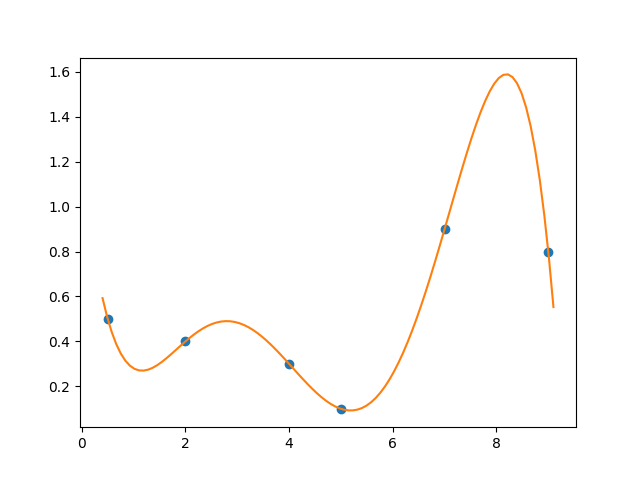

In [106]:
%matplotlib widget
import matplotlib.pyplot as plt

# Invent some raw data 
x=np.array([0.5,2.0,4.0,5.0,7.0,9.0])
y=np.array([0.5,0.4,0.3,0.1,0.9,0.8])

## scipy.interpolate returns a numpy.poly1d instance
lp=sitp.lagrange(x, y)

xx= np.linspace(0.4, 9.1, 100)
fig = plt.figure()
plt.plot(x,y, "o", xx, lp(xx))
plt.show()

Fit a polynomial of arbitrary degree to a data set. Notice that the object returned is not a function this time and needs to be transformed into a function.

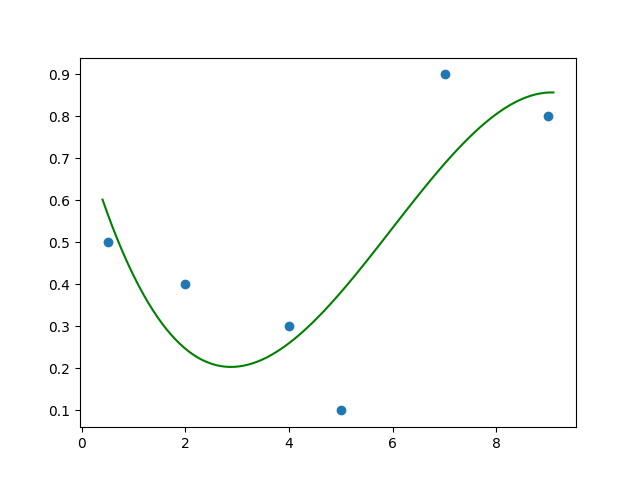

In [107]:
poly_coeffs=np.polyfit(x, y, 3)
p3 = np.poly1d(poly_coeffs)
fig = plt.figure()
plt.plot(x, y, "o", xx, p3(xx), 'g', label='Cubic')
plt.show()

### Optimisation

`scipy.optimise` provides a very wide range of optimisation methods: Newton-like minimization algorithms, least square methods, root finding... 

NB. Examples below are inspired from the official documentation. Interesting examples require setting up complex problems and exceed the scope of this module. You will however encounter more involved optimisation problems later in the course!

In [108]:
import scipy.optimize as sopt

Let's find the minimum of a simple 1D function: <br>

$$ f(x) = -e^{-(x-0.2)^2} $$

In [109]:
## Lets define the function and then pass it to the scipy optimize routine

def f(x):
    return -np.exp(-(x - 0.2)**4)

result = sopt.minimize_scalar(f)

x_min = result.x
print(x_min)

0.1999935940127326


And now a more complex 2D one:

$$ f(x,y)=\frac{1}{2}(1-x)^{2}+(y-x^{2})^{2} $$


In [110]:
def f(x):   # rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

def jacobian(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

sopt.minimize(f, [2,-1], method="Newton-CG", jac=jacobian) 

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 1.5601357400786612e-15
       x: [ 1.000e+00  1.000e+00]
     nit: 10
     jac: [ 1.058e-07 -7.483e-08]
    nfev: 11
    njev: 33
    nhev: 0

### Special functions

`scipy.specials` provides a certain number of useful mathematical functions: Airy functions, Bessel functions, elliptic integrals, gamma function, erf, binomial law, etc. <br>

Reference documentation: https://docs.scipy.org/doc/scipy/reference/special.html

## Plotting with Matplotlib

From the official [documentation](https://matplotlib.org/):
> Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. [...]

> Matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code. For examples, see the sample plots and thumbnail gallery.

> For simple plotting the pyplot module provides a MATLAB-like interface, particularly when combined with IPython. For the power user, you have full control of line styles, font properties, axes properties, etc, via an object oriented interface or via a set of functions familiar to MATLAB users.

In this notebook, we are mostly focused on the [`matplotlib.pyplot`](http://matplotlib.org/api/pyplot_summary.html) submodule.

### Importing Matplotlib

The most standard:
```
import matplotlib.pyplot as plt
```
Imports such as `from matplotlib.pyplot import *` should be avoided, this will pollute your `namespace`!

iPython magic can be used to display plots in the browser:
```
%matplotlib inline
```
or for fancier dynamic plots
```
%matplotlib widget
```
You can see what magic commands do by typing `?%matplotlib inline`. Note that, in that case, you need to import `pyplot` **after** the magic command.

### Basic plots

Let's prepare some data:

In [111]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
z = np.sin(x+np.pi/2)

Plotting this data is as simple as:

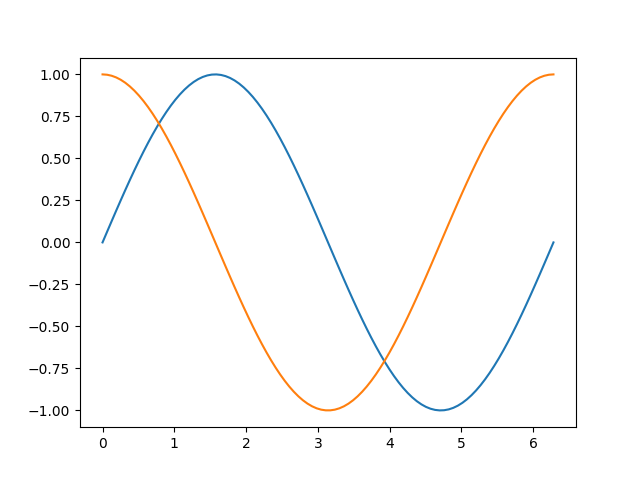

In [112]:
fig = plt.figure()

plt.plot(x, y)
plt.plot(x, z)
plt.show()

or

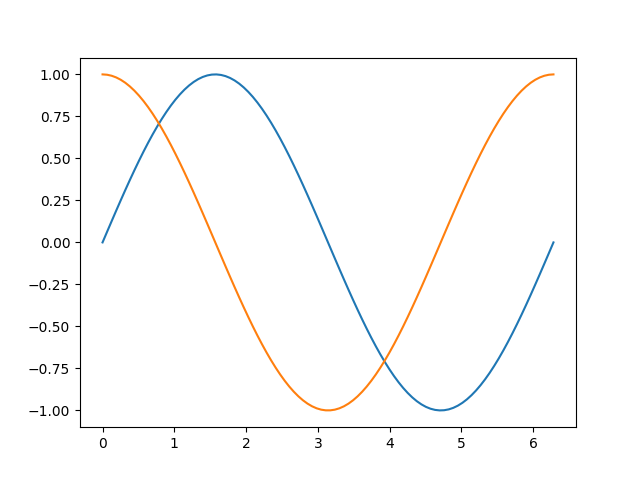

In [113]:
fig = plt.figure()

plt.plot(x,y, x, z)
plt.show()

We can specify axes limits and titles, and a global plot title:

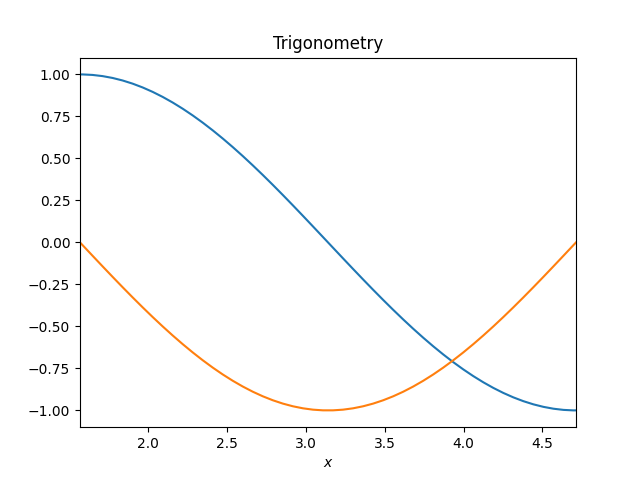

In [114]:
fig = plt.figure()

plt.xlim((x.max()*0.25, x.max()*0.75))
plt.xlabel("$x$")
plt.title("Trigonometry")
plt.plot(x,y, x, z)
plt.show()

as well as legends:

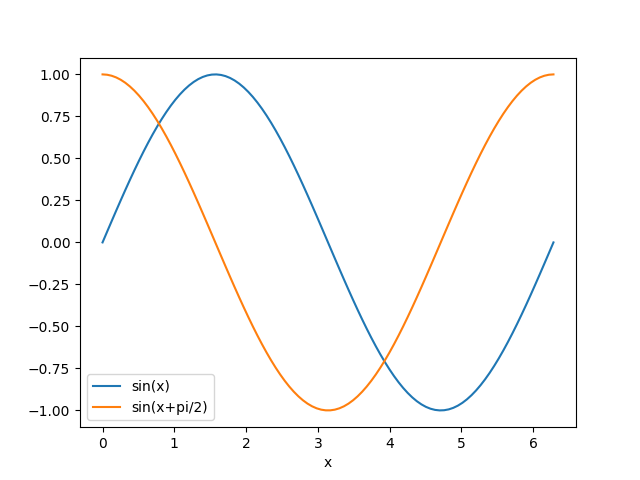

In [115]:
fig = plt.figure()

plt.xlabel("x")
plt.plot(x,y, x, z)
plt.legend(("sin(x)", "sin(x+pi/2)"))
plt.show()

### Line style

Each curve of the plot can be decorated individually:

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
/var/folders/7t/tjy4cfcx0qvdg1gd1b2zx3xm0000gn/T/ipykernel_18070/1674525192.py:8: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x1, z1, 'o--g', label="$sin(x+\pi/2)$", markersize=7.0)


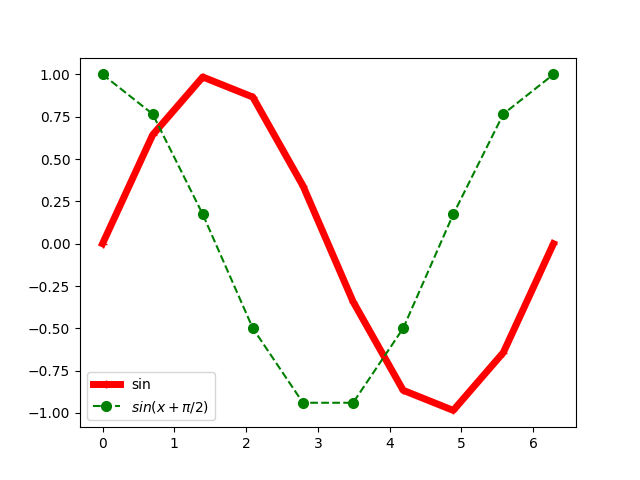

In [116]:
x1 = np.linspace(0, 2*np.pi, 10)
y1 = np.sin(x1)
z1 = np.sin(x1+np.pi/2)

fig = plt.figure()

plt.plot(x1, y1, '+-r', label="sin", linewidth=5.0)
plt.plot(x1, z1, 'o--g', label="$sin(x+\pi/2)$", markersize=7.0)
plt.legend()
plt.show()

Plots can even be annotated !

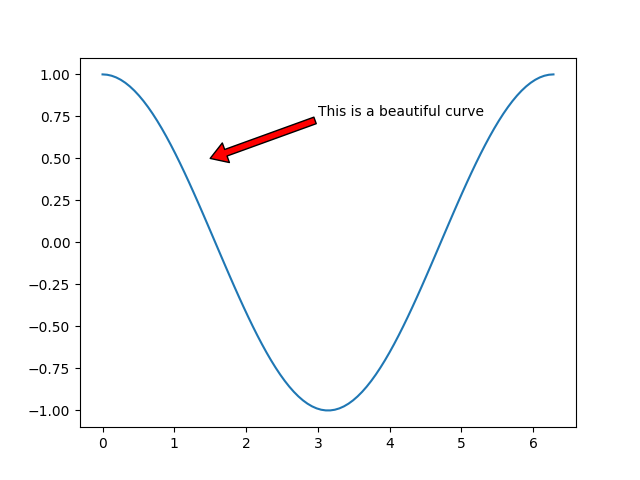

In [117]:
fig = plt.figure()

plt.plot(x, z)
atext = 'This is a beautiful curve'
arrowtiploc = (1.5, 0.5)
textloc=(3, 0.75)
plt.annotate(atext, xy=arrowtiploc, xytext=textloc,
            arrowprops=dict(width=5,headwidth=15,
            facecolor='red'))
plt.show()

### Histograms

Many other forms of plots can be made, such as histograms. For a more complete list see [here](https://matplotlib.org/gallery.html).

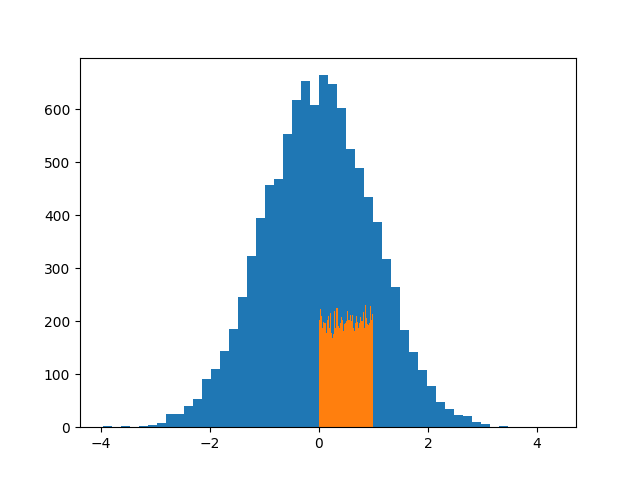

In [118]:
fig = plt.figure()

#10,000 Uniform random numbers
x2 = np.random.random(10000)
#10,000 Normally distributed random numbers
y2 = np.random.randn(10000)
#Plot both on a histogram with 50 bins
plt.hist(y2, 50)
plt.hist(x2, 50)
plt.show() #Or plt.save g("out.png")

### Saving images

Sometimes, you might want to save images for a report or a presentation. Instead of taking a screenshot of the plot, you can save it to a file. The file format is determined by the filename extension you supply. The following common  formats are supported: `.png`, `.jpg`, `.pdf` and `.ps`. There are other options to control the size and resolution of the output.

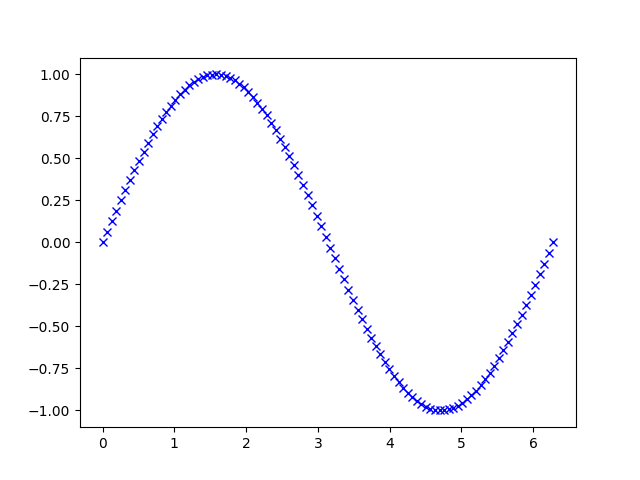

In [119]:
fig = plt.figure()

plt.plot(x, y, 'bx')
plt.savefig("sin.png", dpi=200)
plt.show()

### Subplots

Sometimes, you will want to group several plots in a single figure. Matplotlib provides an flexible way of managing subplots.
```
    (fig, axes) = plt.subplots(nrows, ncols)
```
`subplots()` returns a tuple with a reference to the figure (`fig`) and an array of references to each subplot axes (`axes`)

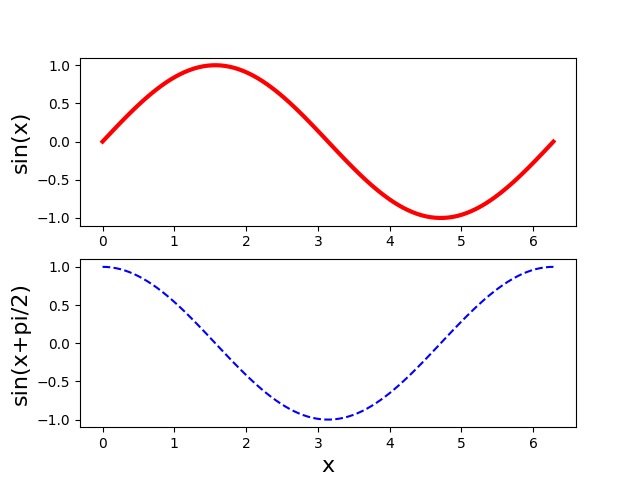

In [120]:
fig, axes = plt.subplots(2,1)
axes[0].plot(x, y, lw=3., c='r')
axes[1].plot(x, z, '--b')
axes[1].set_xlabel("x", fontsize=16)
axes[0].set_ylabel("sin(x)", fontsize=16)
axes[1].set_ylabel("sin(x+pi/2)", fontsize=16)
plt.show()

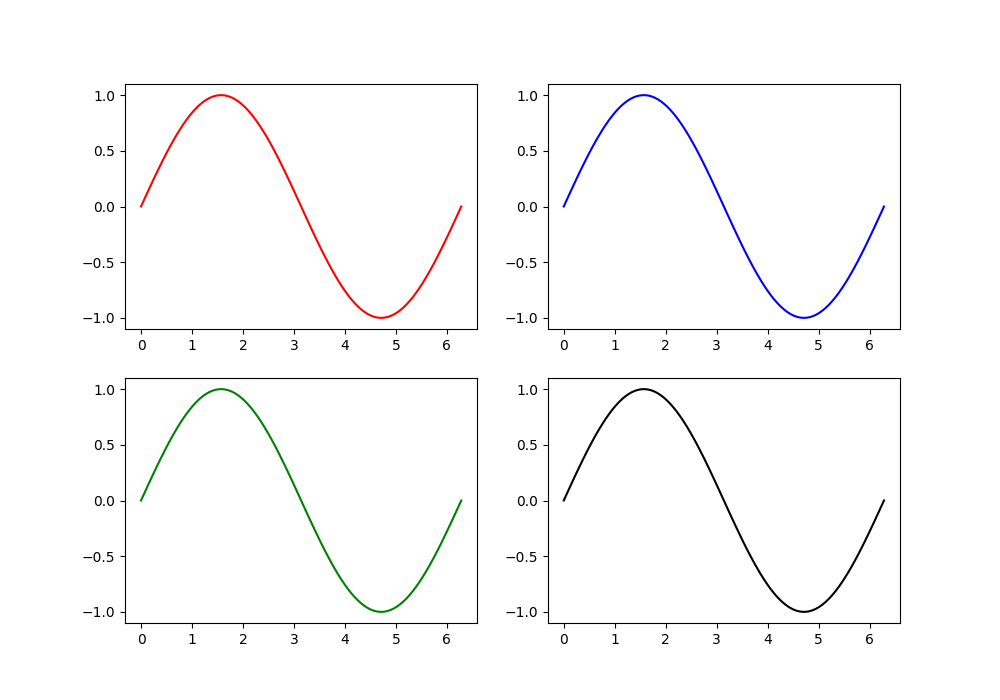

In [121]:
(fig, axes) = plt.subplots(2, 2, figsize=(10,7))
axes[0,0].plot(x, y, 'r')
axes[0,1].plot(x, y, 'b')
axes[1,0].plot(x, y, 'g')
axes[1,1].plot(x, y, 'k')
plt.show()

Alternatively, you can select a subplot and make it the "current subplot"

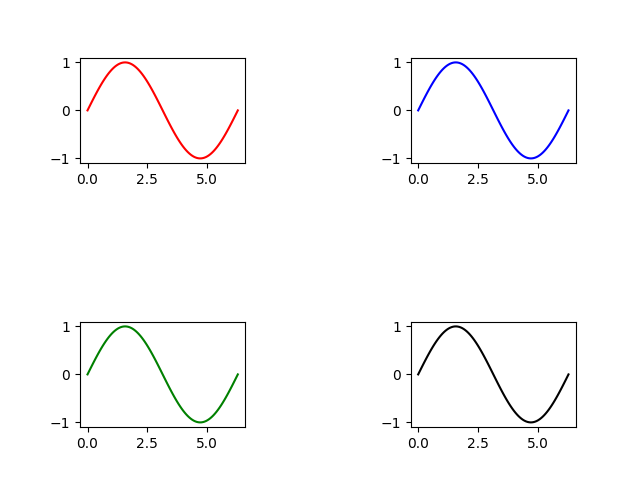

In [122]:
(fig, axes) = plt.subplots(2, 2)
plt.subplots_adjust(wspace = 1., hspace=1.5)

plt.sca(axes[0,0])
plt.plot(x, y, 'r')
plt.sca(axes[0,1])
plt.plot(x, y, 'b')
plt.sca(axes[1,0])
plt.plot(x, y, 'g')
plt.sca(axes[1,1])
plt.plot(x, y, 'k')
plt.show()

For more complex subplot layouts `plt.subplot2grid` can be used. It maps the figure to a grid, and you can define subplots spanning across several cells of the grid. It takes 4 arguments:
```
subplot2grid(shape,
             location,
             rowspan = 1,
             colspan = 1)
```
`shape` is the shape of the grid (number of cells), it needs to be the same for each call of the function within one figure. `location` is the location of the top-left corner of the subplot. `rowspan` and `colspan` define respectively the length and heigth of the plot.

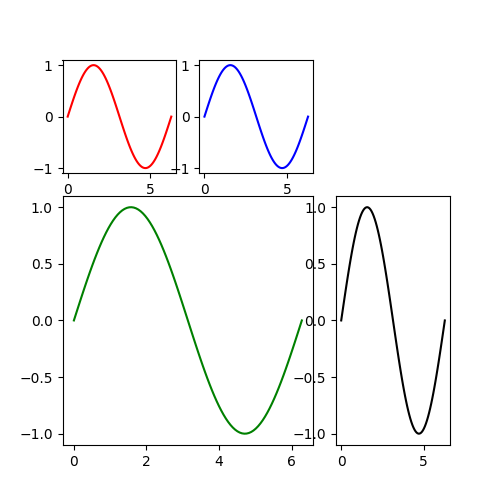

In [123]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(5)

ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=1)
ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
# what happens if you uncomment the following line? 
#ax5 = plt.subplot2grid((3, 3), (1, 1), colspan=1, rowspan=1)
ax1.plot(x, y, 'r')
ax2.plot(x, y, 'b')
ax3.plot(x, y, 'g') 
ax4.plot(x, y, 'k')
plt.show()

### 2D Plots

There are several ways to represent multidimensional data. One can choose to represent the data contained in a 2D domain (a matrix) with colors (in a 2D plot), or with surfaces (in a 3D plot).

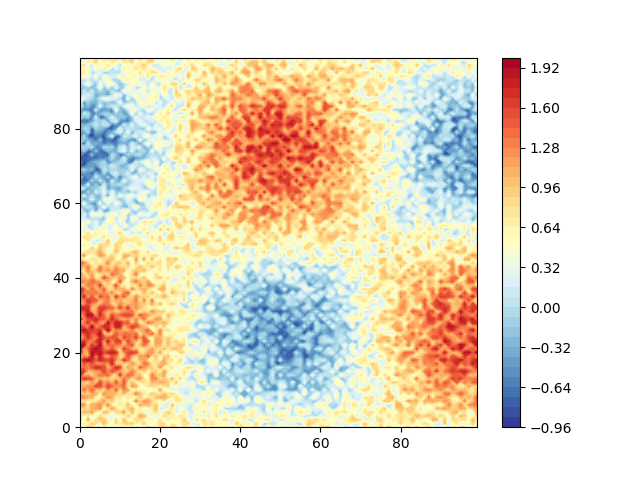

In [124]:
fig = plt.figure()

N = 100
x = np.linspace(0,2*np.pi,N)
y = np.sin(x); z = np.cos(x)
#Create 2D field from outer product of previous 1D functions
noise = np.random.random(N**2)
u = np.outer(y,z) + noise.reshape(N,N)
plt.contourf(u, 40, cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.show()

### <span style="color:blue">Exercise 2.15</span>

Consider the following functions defined on a 2D 'square' domain $\Omega = [0,1]$:

$$ a(x) = \tanh\left(50\sin\left(\frac{25}{2}\pi x\right)\right)$$

and

$$ f(\mathbf{x}) = a(a(|\mathbf{x}-\mathbf{x}_0|)) + a(a(|\mathbf{x}-\mathbf{x}_1|)) $$

for any $\mathbf{x} \in \Omega$, with $\mathbf{x}_0=(0,0)$ and $\mathbf{x}_1=(1,1)$

Plot $f$ on $\Omega$. You may want to use `numpy.meshgrid`.

Call the function $f(\mathbf{x})$ `func_f(x,y)` and have its input be 1D array's for the sample x and y-coordinates. <br>
The function $a(x)$ should be called `func_a(x)`. <br>

In [1]:
fig = plt.figure()
## Solution...

def func_a(x):
    return np.tanh(50*np.sin(25*np.pi*x/2))

def func_f(x, y):
    x0, y0 = 0, 0
    x1, y1 = 1, 1
    r0 = la.norm((x - x0, y - y0), axis=0)
    r1 = la.norm((x - x1, y - y1), axis=0)
    print(r0.shape)
    return func_a(func_a(r0)) + func_a(func_a(r1))

x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x, y)

# Compute the function values on the grid
Z = func_f(X, Y)

# Plot the function
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of f(x, y) on [0, 1] x [0, 1]')
plt.show()

NameError: name 'plt' is not defined

In [126]:
## The following code is used to check you solution and should not be modified
## It should help you by providing feedback to the solution you have provided
x = np.arange(0, 1, 0.001)
y = np.arange(0, 1, 0.001)
with pybryt.check(pybryt_reference(2, 15)):
    test_pts = np.linspace(0, 2,10000)
    func_a(test_pts)
    func_f(x,y)

REFERENCE: exercise-2_15
SATISFIED: False
MESSAGES:
  - SUCCESS: Great, your function a(x) seems to be working fine.
  - ERROR: Check that your function f(x) is working as intended.
  - SUCCESS: Well done! You have used vectorisation instead of using a loop.


### 3D Plots

A wide variety of options are available for 3D plots, they are usually contained in specific submodules.

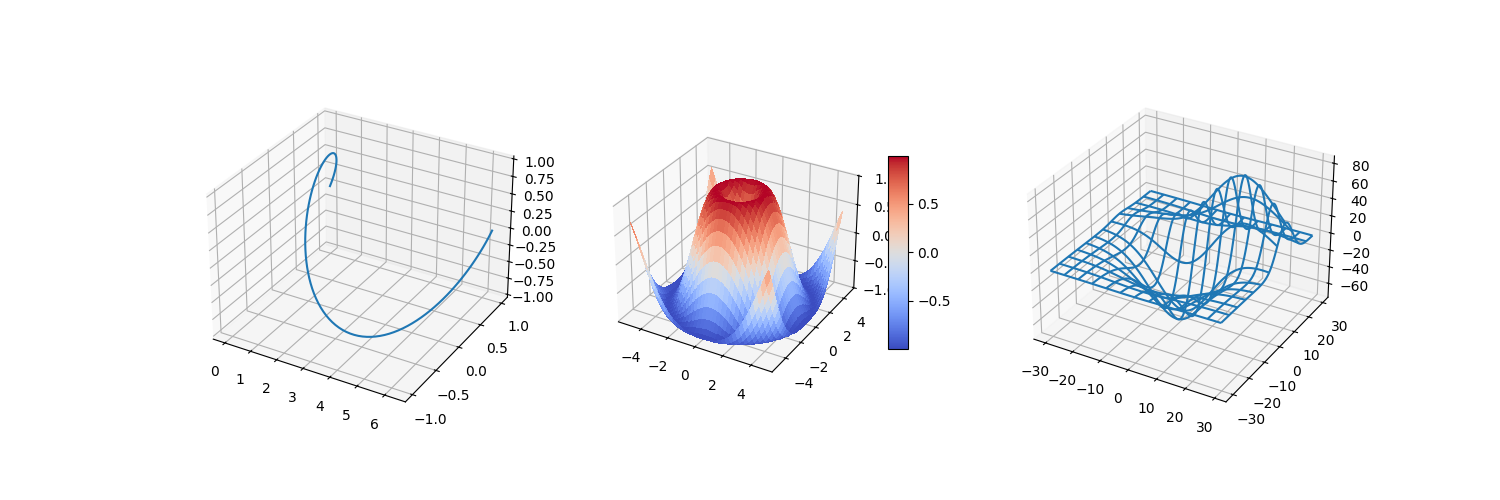

In [127]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.axes3d import get_test_data

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)

ax = fig.add_subplot(1,3,1, projection='3d')

# plot a curve
x = np.linspace(0.,2*np.pi,100)
ax.plot(x, np.cos(x), np.sin(x))

ax = fig.add_subplot(1, 3, 2, projection='3d')

# plot a 3D surface
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

ax = fig.add_subplot(1, 3, 3, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

### Animations

Animations (*i.e.* series of images) can be created with matplotlib. However, exercise some restraint as they can require significant resources.

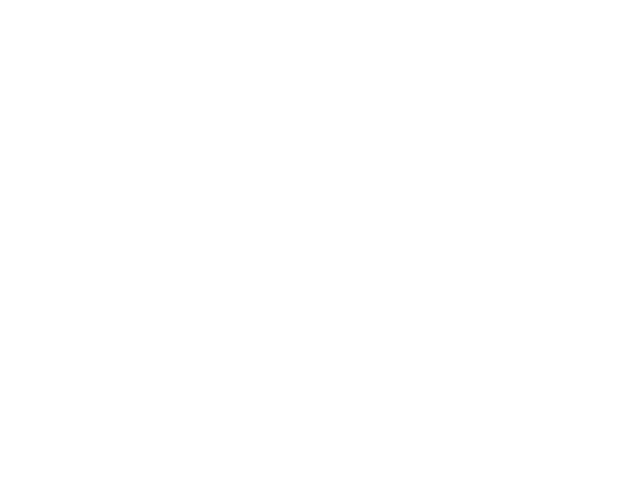

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

fig = plt.figure()

def get_field(a, N = 100):
    x = a*np.linspace(0,2*np.pi,N)
    y = np.sin(x); z = np.cos(x)
    out =  np.outer(y,z)
    plt.contourf(out, 40, cmap=plt.cm.RdYlBu_r)

        
ani= matplotlib.animation.FuncAnimation(plt.gcf(), get_field, frames=range(0,10),
                                       interval=500, repeat=False)
plt.show()

/opt/anaconda3/envs/mpm2024/lib/python3.12/site-packages/matplotlib/animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


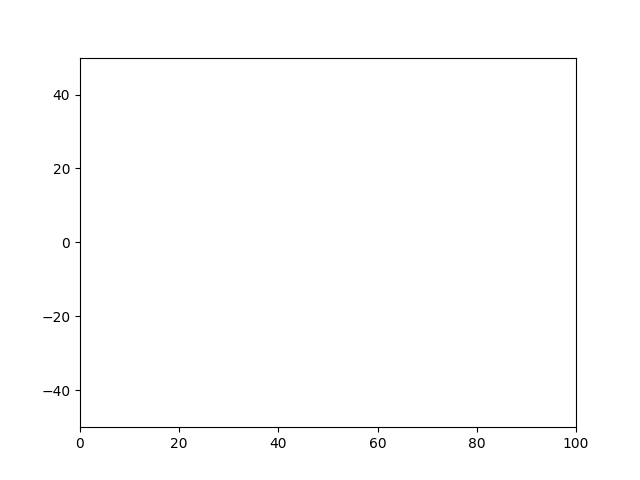

In [129]:
import random

ysample = random.sample(range(-50, 50), 100)

xdata = []
ydata = []

fig = plt.figure()

axes = plt.gca()
axes.set_xlim(0, 100)
axes.set_ylim(-50, +50)
line, = axes.plot(xdata, ydata, 'r-')

def update(i):
    xdata.append(i)
    ydata.append(ysample[i])
    line.set_xdata(xdata)
    line.set_ydata(ydata)

ani= matplotlib.animation.FuncAnimation(plt.gcf(), update, frames=100,
                                       interval=100, repeat=False)

plt.show()

Movies can be generated by saving images then calling an external program like `ffmpeg`, or using the `writers` function from the `animation` submodule, which also uses `ffmpef` under the hood.

### Widgets

Matplotlib provides widgets, that allow you to create dynamic plots with sliders and things like that.

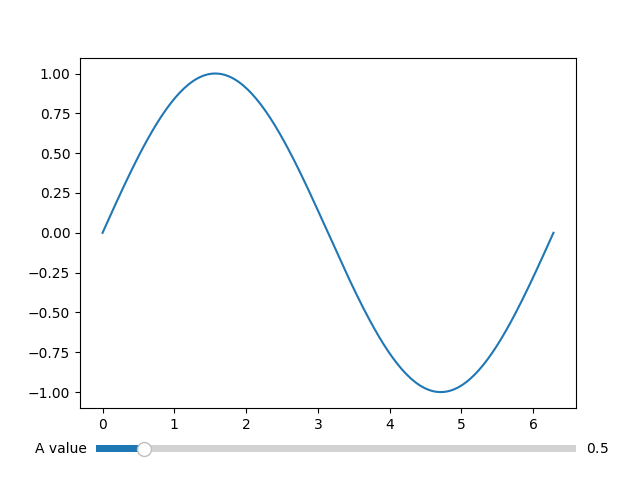

In [130]:
import matplotlib.widgets as mw

fig = plt.figure()

#Setup initial plot of sine function
x = np.linspace(0, 2*np.pi, 200)
l, = plt.plot(x, np.sin(x))
#Adjust figure to make room for slider
plt.subplots_adjust(bottom=0.15)
axslide = plt.axes([0.15, 0.05, 0.75, 0.03]) 
s = mw.Slider(axslide, 'A value', 0., 5.)

#Define function
def update(A):
    l.set_ydata(np.sin(A*x))
    plt.draw()
#Bind update function to change in slider
s.on_changed(update)
plt.show()

## Summary

  * `NumPy`: defines `nd.array`'s which are an efficient data structure for large vectors, matrices and tensors, and provides many functions to manipulate them.
  * `SciPy`: defines a lot of user-friendly routines useful for scientific codes.
  * Both utilize efficient low level code under the hood, and hence will generally be much faster than re-implement function yourself in pure Python.
  * Vectorization !
  * `Matplotlib`: allows you to draw and save plots, from the simplest 2D line plot to complicated 3D plots.
  * Refer to the online documentation for a complete list of features: https://docs.scipy.org/doc/